In [24]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/gabinmberikongo/code/projet/loan_credit/scripts')

from processing import *
from plots import *
import seaborn as sns
%matplotlib inline

In [3]:
# open data 
data = pd.read_csv('/Users/gabinmberikongo/code/projet/loan_credit/data/accepted_2007_to_2018Q4.csv')

In [4]:
pd.set_option('display.max_rows', None)
data.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [5]:
get_na_percentage(data)[:20]

id                       0.000000
member_id              100.000000
loan_amnt                0.001460
funded_amnt              0.001460
funded_amnt_inv          0.001460
term                     0.001460
int_rate                 0.001460
installment              0.001460
grade                    0.001460
sub_grade                0.001460
emp_title                7.387178
emp_length               6.499754
home_ownership           0.001460
annual_inc               0.001637
verification_status      0.001460
issue_d                  0.001460
loan_status              0.001460
pymnt_plan               0.001460
url                      0.001460
desc                    94.423544
dtype: float64

In [6]:
df= select_column(data, 40)
df.shape

(2260701, 105)

In [7]:
num_df, cat_df = split_dataframe_by_dtype(df)

In [8]:
num_df.shape

(2260701, 81)

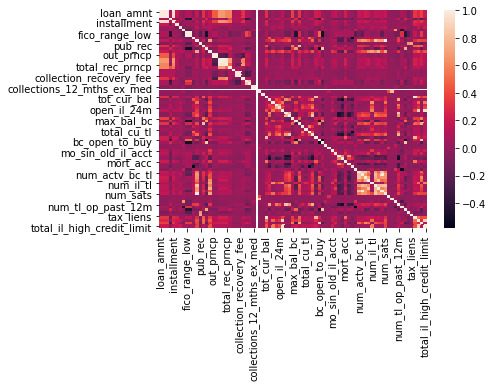

In [9]:
ax = sns.heatmap(num_df.corr())

In [10]:
y = cat_df.loan_status
cat_df = transform_categorical(cat_df.drop(columns='loan_status'))


In [11]:
cat_df.head()

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
2,2,1,1,2,2,0,0,0,0,0,...,2,2,2,0,2,0,1,0,0,0
3,3,1,0,3,3,0,0,1,0,0,...,3,3,3,0,3,0,0,0,0,0
4,4,1,2,4,4,1,0,1,0,0,...,4,0,4,0,4,1,0,0,0,0


In [12]:
num_df = num_df.fillna(num_df.median())
cat_df = cat_df.fillna(cat_df.median())

In [13]:
X = pd.concat([num_df, cat_df], axis=1)

In [14]:
y = transform_y(y)
print(y[:5])

0    paid
1    paid
2    paid
3    paid
4    paid
Name: loan_status, dtype: object


In [31]:
y = pd.factorize(y)[0]

In [15]:
_, X = selection_variable(X, y)

/Users/gabinmberikongo/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/gabinmberikongo/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [41]:
X.to_csv("/Users/gabinmberikongo/code/projet/loan_credit/data/selected_var_data.csv", index=False)
y_df = pd.DataFrame({"loan_status": y})
y_df.to_csv("/Users/gabinmberikongo/code/projet/loan_credit/data/target.csv", index=False)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
models = []
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(KNeighborsClassifier(n_neighbors=20))
models.append(GaussianNB())
models.append(AdaBoostClassifier(n_estimators=100))

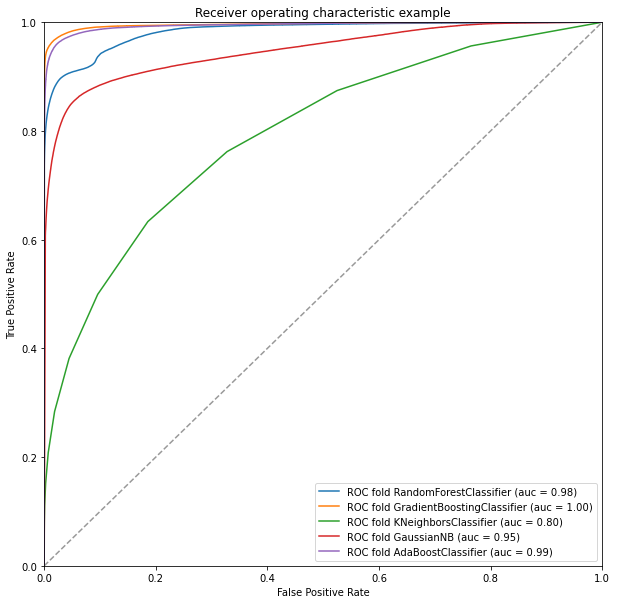

In [35]:
model_selection_plot(models, X_train, y_train, X_test, y_test)